In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Simple Usage

In [2]:
import sys
sys.path.append('../../../')
from CEmulator.Emulator import HMF_CEmulator

##### import the emulator for the original cosmology [only one single massive neutrino]
csstemu = HMF_CEmulator(verbose=True, neutrino_mass_split='single')
m_edges = np.logspace(10, 16, 60+1)
zlists  = np.array([0.0, 1.0, 2.0, 3.0])

Loading the PkcbLin emulator...
Using 513 training samples.
Loading the PknnLin emulator...
Using 512 training samples [remove c0001 (no massive neutrino)].
The neutrino mass is treated as a single massive component.
Loading the hmf_rockstar_M200m emulator...
Using 129 training samples.
Loading the hmf_fof_M200c emulator...
Using 129 training samples.
Loading the hmf_rockstar_Mvir emulator...
Using 129 training samples.


In [3]:
csstemu.set_cosmos(As=2e-9)
%time N_emu_200m = csstemu.get_Nhalo(M=m_edges, z=zlists, massdef='RockstarM200m')
%time N_emu_mvir = csstemu.get_Nhalo(M=m_edges, z=zlists, massdef='RockstarMvir')
%time N_emu_200c = csstemu.get_Nhalo(M=m_edges, z=zlists, massdef='FoFM200c')

CPU times: user 491 ms, sys: 855 µs, total: 492 ms
Wall time: 492 ms
CPU times: user 486 ms, sys: 8.19 ms, total: 494 ms
Wall time: 495 ms
CPU times: user 481 ms, sys: 0 ns, total: 481 ms
Wall time: 482 ms


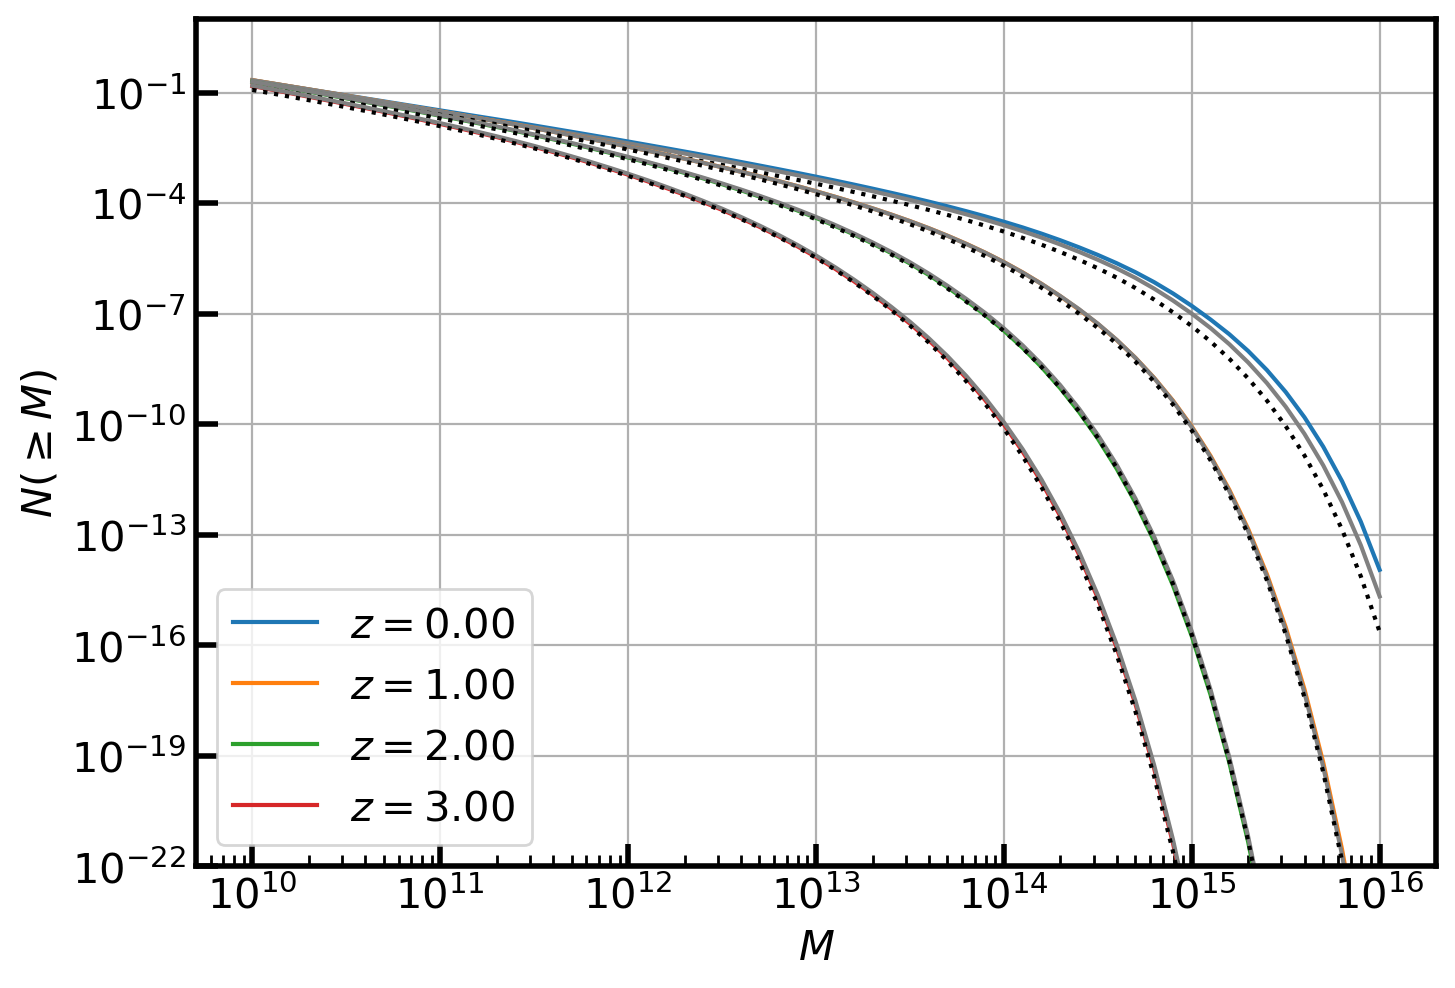

In [4]:
with plt.style.context('article'):
    for iz in range(len(zlists)):
        plt.plot(m_edges, N_emu_200m[iz], label=r'$z={:.2f}$'.format(zlists[iz]))
        plt.plot(m_edges, N_emu_mvir[iz], 'gray')
        plt.plot(m_edges, N_emu_200c[iz], 'k:')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel(r'$M$')
    plt.ylabel(r'$N(\geq M)$')
    plt.ylim([1e-22, 1e1])

In [5]:
csstemu.set_cosmos(As=2e-9)
mcen = 10**((np.log10(m_edges[1:]) + np.log10(m_edges[:-1]))/2)
%time dN_emu_200m = csstemu.get_dndlnM(M=mcen, z=zlists, massdef='RockstarM200m')
%time dN_emu_mvir = csstemu.get_dndlnM(M=mcen, z=zlists, massdef='RockstarMvir')
%time dN_emu_200c = csstemu.get_dndlnM(M=mcen, z=zlists, massdef='FoFM200c')


CPU times: user 485 ms, sys: 927 µs, total: 486 ms
Wall time: 486 ms
CPU times: user 484 ms, sys: 224 µs, total: 484 ms
Wall time: 485 ms
CPU times: user 486 ms, sys: 0 ns, total: 486 ms
Wall time: 487 ms


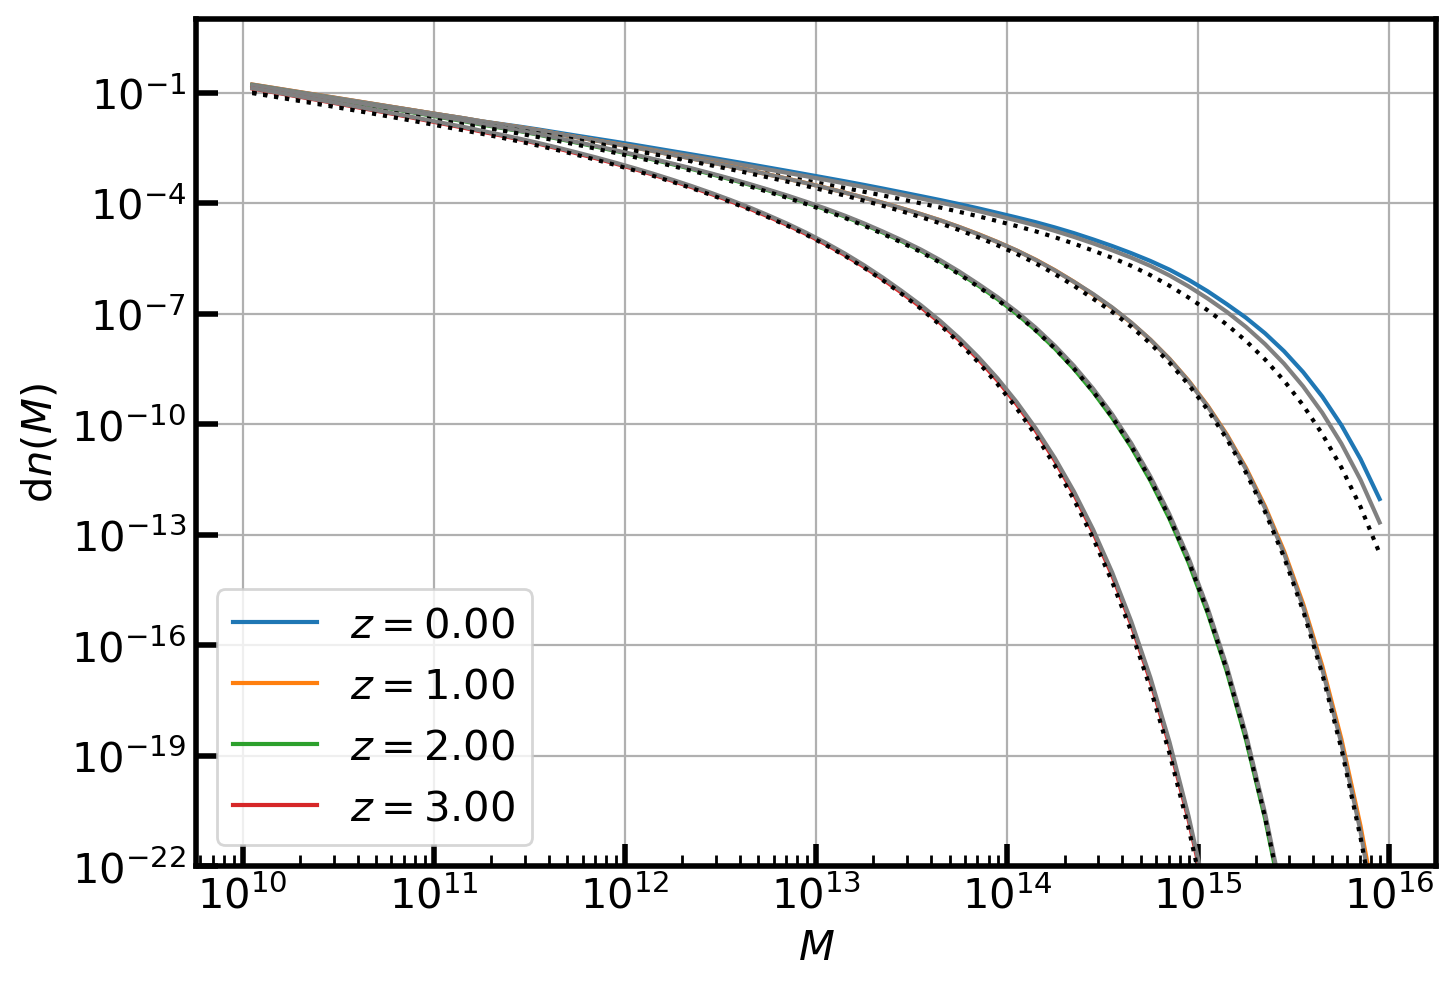

In [6]:
with plt.style.context('article'):
    for iz in range(len(zlists)):
        plt.plot(mcen, dN_emu_200m[iz], label=r'$z={:.2f}$'.format(zlists[iz]))
        plt.plot(mcen, dN_emu_mvir[iz], 'gray')
        plt.plot(mcen, dN_emu_200c[iz], 'k:')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel(r'$M$')
    plt.ylabel(r'$\mathrm{d} n (M)$')
    plt.ylim([1e-22, 1e1])